In [12]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.masks import extract_masks, binarize, resample_mask
from utils.images import normalize, resample_img
from utils.registration import est_lin_transf, apply_lin_transf, est_nl_transf, apply_nl_transf
from utils.plot_methods import plot_transf

In [25]:
fix_img = sitk.ReadImage('./data/common_40_image.nii.gz', sitk.sitkFloat32)
fix_img_data = sitk.GetArrayFromImage(fix_img)
fix_mask = sitk.ReadImage('./data/common_40_mask.nii.gz', sitk.sitkFloat32)
fix_mask_data = sitk.GetArrayFromImage(fix_mask)

Text(0.5, 1.0, 'Fix image and thresholding mask')

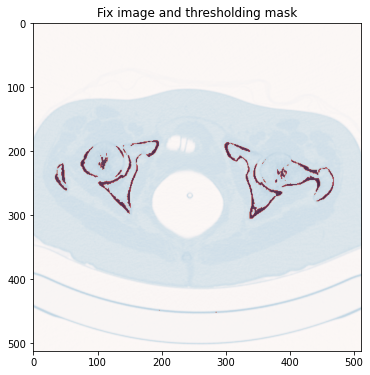

In [54]:
thresh_mask = sitk.BinaryThreshold(fix_img, lowerThreshold=450, upperThreshold=2500, insideValue=1, outsideValue=0)
thresh_mask_data = sitk.GetArrayFromImage(thresh_mask)
idx = 70
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(fix_img_data[idx], cmap='Blues',alpha = 0.8) # fixed image
plt.imshow(thresh_mask_data[idx], cmap='Reds',alpha = 0.6) # fixed image
plt.title('Fix image and thresholding mask')

In [55]:
dilate_filter = sitk.BinaryDilateImageFilter()
dilate_filter.SetKernelRadius(3)
dilate_filter.SetKernelType(sitk.sitkBall)
new_thresh_mask = dilate_filter.Execute(thresh_mask)
new_thresh_mask_data = sitk.GetArrayFromImage(new_thresh_mask)

Text(0.5, 1.0, 'Fix image and thresholding mask')

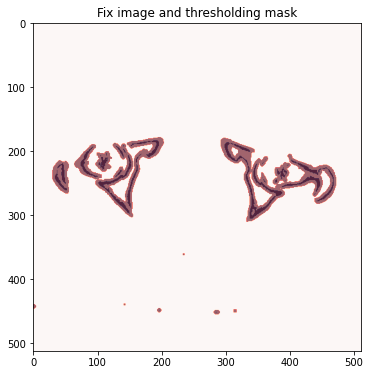

In [56]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(thresh_mask_data[idx], cmap='Blues',alpha = 0.8) # fixed image
plt.imshow(new_thresh_mask_data[idx], cmap='Reds',alpha = 0.6) # fixed image
plt.title('Fix image and thresholding mask')

In [57]:
mov_img = sitk.ReadImage('./data/g1_53_image.nii.gz',sitk.sitkFloat32)
mov_mask = sitk.ReadImage('./data/g1_53_mask_2.nii.gz',sitk.sitkFloat32)


In [58]:
fix_img = resample_img(fix_img, out_size=[512,512,205])
thresh_mask = resample_mask(new_thresh_mask, out_size=[512,512,205])
mov_img = resample_img(mov_img, out_size=[512,512,205])
mov_mask = resample_mask(mov_mask, out_size=[512,512,205])


In [62]:
lin_transf = est_lin_transf(fix_img, thresh_mask, mov_img)


--------
Linear registration:
Final mean squares value: 188940.9147722991
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Number of iterations: 9
--------


In [63]:
aligned_img = apply_lin_transf(fix_img, mov_img, lin_transf)
aligned_mask = apply_lin_transf(fix_img, mov_mask, lin_transf)

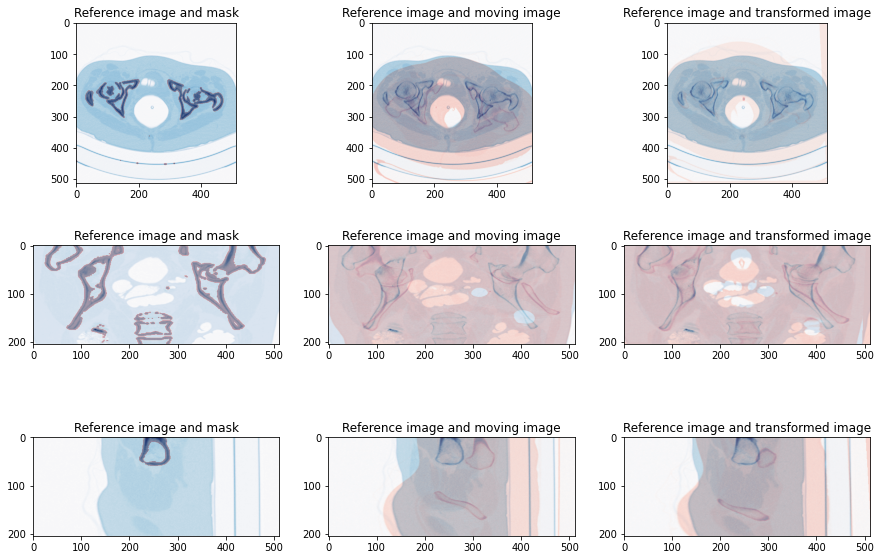

In [64]:
x,y,z = 50, 250, 450
plot_transf(fix_img, thresh_mask, mov_img, aligned_img, x, y, z)

In [65]:
nl_transf = est_nl_transf(fix_img, thresh_mask, aligned_img)


--------
Demons registration:
Final metric value: 469088.74527838506
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Number of iterations: 9
--------


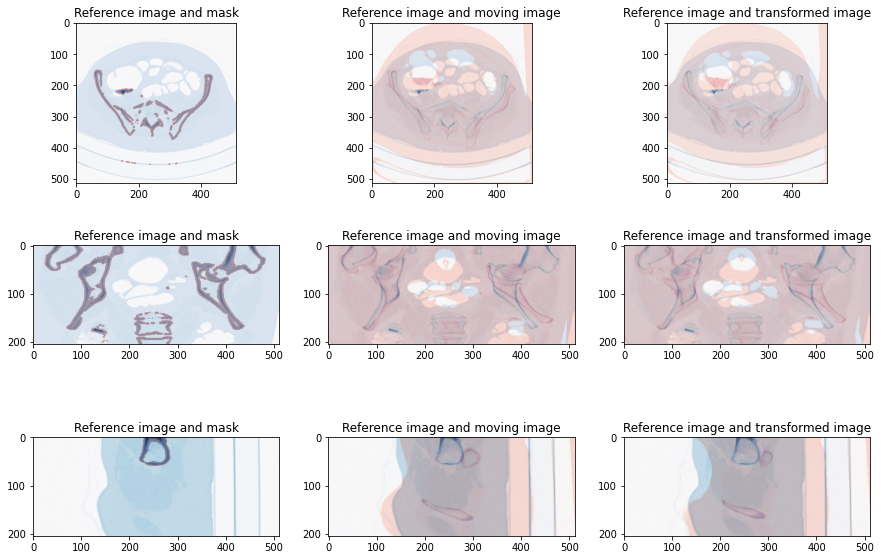

In [66]:
mov_img_resampled = apply_nl_transf(fix_img, aligned_img, nl_transf)
mov_mask_resampled = apply_nl_transf(fix_img, aligned_mask, nl_transf)

x,y,z = 140, 250, 450
plot_transf(fix_img, thresh_mask, aligned_img, mov_img_resampled, x, y, z)